In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold

In [2]:
np.random.seed(42)

In [3]:
# Dogs : higher ear flappiness index, lower whisker length
dogs_whisker_length = np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8,scale=1,size=10)


In [4]:
# Cats : lower ear flappiness index,higher whisker length
cats_whisker_length = np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index = np.random.normal(loc=5,scale=1,size=10)


In [6]:
dogs_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T
data = np.vstack((dogs_data,cats_data))
labels = np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

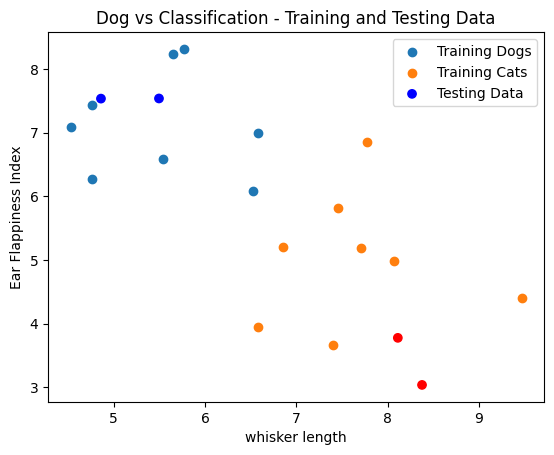

In [8]:
plt.scatter(x_train[y_train == 0][:,0],x_train[y_train == 0][:,1],label='Training Dogs')
plt.scatter(x_train[y_train == 1][:,0],x_train[y_train == 1][:,1],label="Training Cats")
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='bwr',label='Testing Data')
plt.xlabel('whisker length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Classification - Training and Testing Data')
plt.legend()
plt.show()

In [10]:
def random_linear_classifier(data_dogs,data_cats,k,d):
    # d = number of features
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs,data_cats,theta,theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    return best_theta, best_theta0,best_error

def compute_error(data_dogs,data_cats,theta,theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog) + theta0 <=0:
            error +=1
    for x_cat in data_cats:
        if np.dot(theta,x_cat) + theta0 >0:
            error +=1
    return error

In [20]:
def cross_validate(data_dogs,data_cats,k_values,d,n_splits=5):
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index,val_index in kf.split(data_dogs):
            x_train_fold = np.vstack((data_dogs[train_index],data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)),np.ones(len(train_index))))
            x_val_fold = np.vstack((data_dogs[val_index],data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold , best_theta0_fold,error = random_linear_classifier(x_train_fold[y_train_fold == 0],x_train_fold[y_train_fold == 1],k,d)
            errors.append(compute_error(x_val_fold[y_val_fold ==0],x_val_fold[y_val_fold==1],best_theta_fold,best_theta0_fold))

        avg_errors.append(np.mean(errors))
    
    best_k = k_values[np.argmin(avg_errors)]
    return best_k


In [21]:
k_values = [1,10,50,100,200]
best_k = cross_validate(dogs_data,cats_data,k_values,d=2)
print(best_k)

50


In [22]:
k = 50 # number of iteraton

d = 2
best_theta_train,best_theta0_train,train_error = random_linear_classifier(x_train[y_train == 0],x_train[y_train == 1],k,d)


In [23]:
x_vals_train = np.linspace(2,10,100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1])*x_vals_train - (best_theta0_train / best_theta_train[1])


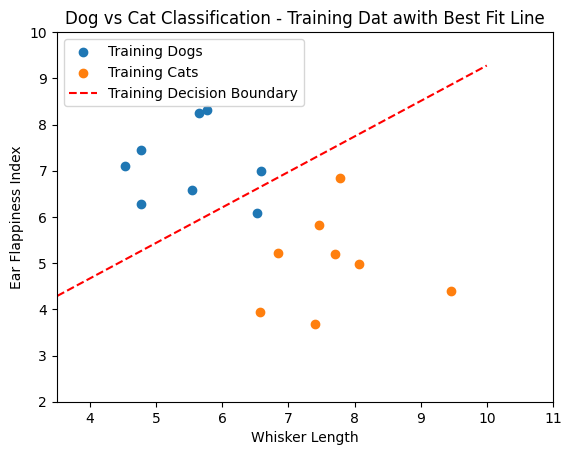

In [24]:
plt.scatter(x_train[y_train == 0][:,0],x_train[y_train == 0][:,1],label='Training Dogs')
plt.scatter(x_train[y_train == 1][:,0],x_train[y_train == 1][:,1],label="Training Cats")
plt.plot(x_vals_train,y_vals_train,color='red',linestyle='--',label='Training Decision Boundary')

plt.xlim([3.5,11])
plt.ylim([2,10])

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Training Dat awith Best Fit Line')
plt.legend()
plt.show()

In [25]:
print(f'Training Error: {train_error}')

Training Error: 1


In [26]:
test_error = compute_error(x_test[y_test == 0],x_test[y_test == 1],best_theta_train,best_theta0_train)
print(f'Testing Error: {test_error}')

Testing Error: 0


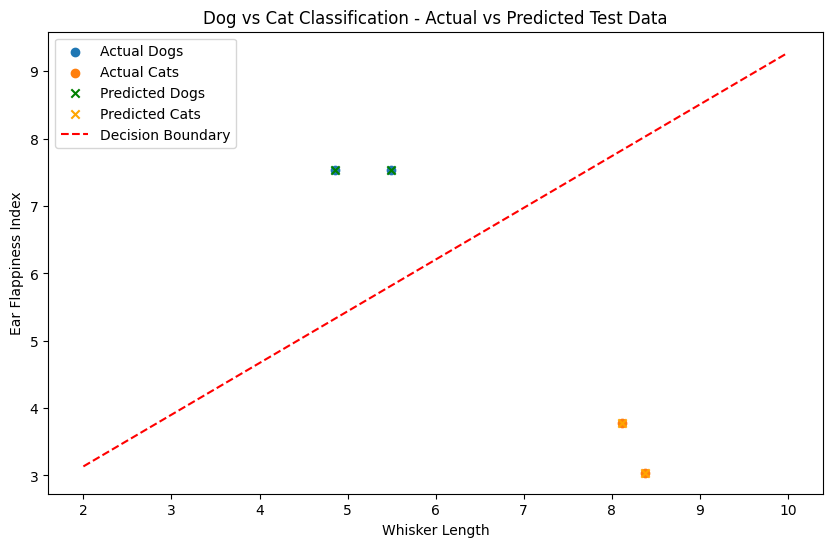

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], label='Actual Dogs')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], label='Actual Cats')

# Predict test data points using the decision boundary 
predicted_test_labels = np.ones_like(y_test)
for i, X_test in enumerate(x_test):
  if np.dot(best_theta_train, X_test) + best_theta0_train > 0:
    predicted_test_labels[i] = 0
  
# Plot predicted test data points
plt.scatter(x_test[predicted_test_labels == 0][:, 0], x_test[predicted_test_labels == 0][:, 1], marker='x', label='Predicted Dogs', color='green')
plt.scatter(x_test[predicted_test_labels == 1][:, 0], x_test[predicted_test_labels == 1][:, 1], marker='x', label='Predicted Cats', color='orange')

# Plot decision boundary
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Actual vs Predicted Test Data')
plt.legend(loc='upper left')
plt.show()